In [1]:
import sys
sys.path.append(".")

In [6]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

## XJTU Dataset (Charge)

In [3]:
mat = loadmat("data/XJTU/charge/batch-1.mat")
battery = mat["battery"]

data = []
label = []

battery.shape # (1,8)

current_battery = battery[0,0][0]
print(current_battery.shape)

#current_battery[0,0]

for i in range(current_battery.shape[1]):
    cycle_data = current_battery[0,i]
    current = cycle_data["current_A"]
    voltage = cycle_data["voltage_V"]
    temperature = cycle_data["temperature_C"]
    charge_cycle = np.concatenate([current, voltage, temperature], axis=0)
    data.append(charge_cycle.T)
    
    capacity = cycle_data["capacity"]
    label.append(capacity.T)
    
    print(charge_cycle.shape, capacity.shape)
    break
# data = np.array(data, dtype=np.float32)
# label = np.array(label, dtype=np.float32)

(1, 389)
(3, 128) (1, 1)


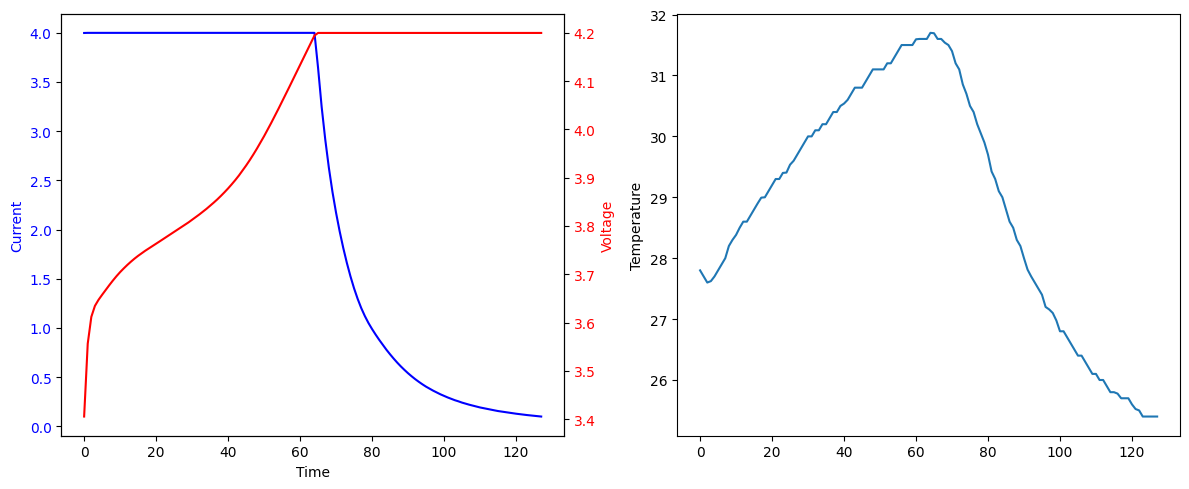

In [15]:
cycle_data = current_battery[0,120]
current = cycle_data["current_A"]
voltage = cycle_data["voltage_V"]
temperature = cycle_data["temperature_C"]

fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot current on the left y-axis
ax[0].plot(current.reshape(-1,1), 'b-', label='Current')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Current', color='b')
ax[0].tick_params(axis='y', labelcolor='b')

# Create a second y-axis for voltage
ax2 = ax[0].twinx()
ax2.plot(voltage.reshape(-1,1), 'r-', label='Voltage')
ax2.set_ylabel('Voltage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[1].plot(temperature.reshape(-1,1), label="Temperature")
ax[1].set_ylabel("Temperature")



fig.tight_layout()  # Adjust layout to fit both labels
plt.show()

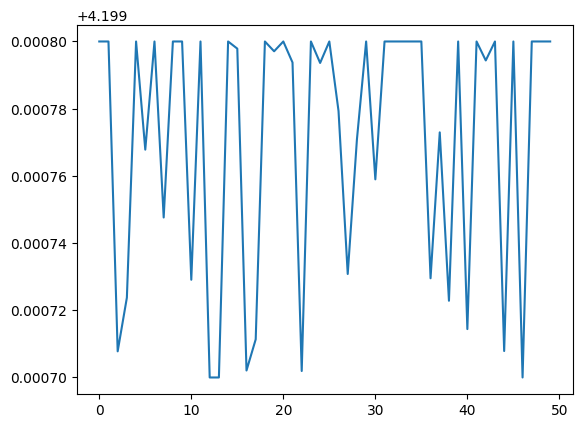

In [10]:
plt.figure()
plt.plot(voltage.reshape(-1,1)[-50:,])
plt.show()

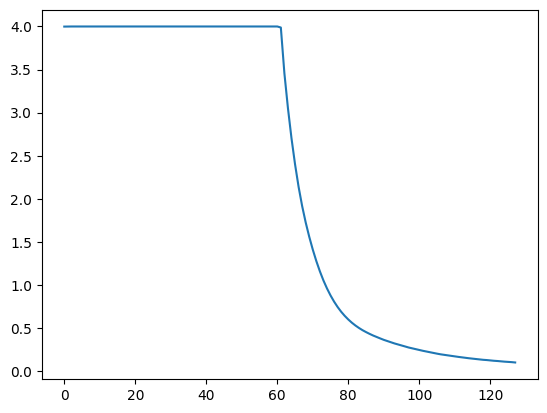

In [6]:
plt.figure()
plt.plot(current.reshape(-1,1))
plt.show()

## XJTU Dataset (Partial Charge)

In [4]:


mat = loadmat("data/XJTU/partial_charge/batch-1_3.7-4.1.mat")
battery = mat["battery"]

data = []
label = []

battery.shape # (1,8)

current_battery = battery[0,0][0]
print(current_battery.shape)

#current_battery[0,0]

for i in range(current_battery.shape[1]):
    cycle_data = current_battery[0,i]
    current = cycle_data["current_A"]
    voltage = cycle_data["voltage_V"]
    temperature = cycle_data["temperature_C"]
    charge_cycle = np.concatenate([current, voltage, temperature], axis=0)
    data.append(charge_cycle.T)
    
    capacity = cycle_data["capacity"]
    label.append(capacity.T)
    
    print(charge_cycle.shape, capacity.shape)
    break
# data = np.array(data, dtype=np.float32)
# label = np.array(label, dtype=np.float32)

(1, 389)
(3, 128) (1, 1)


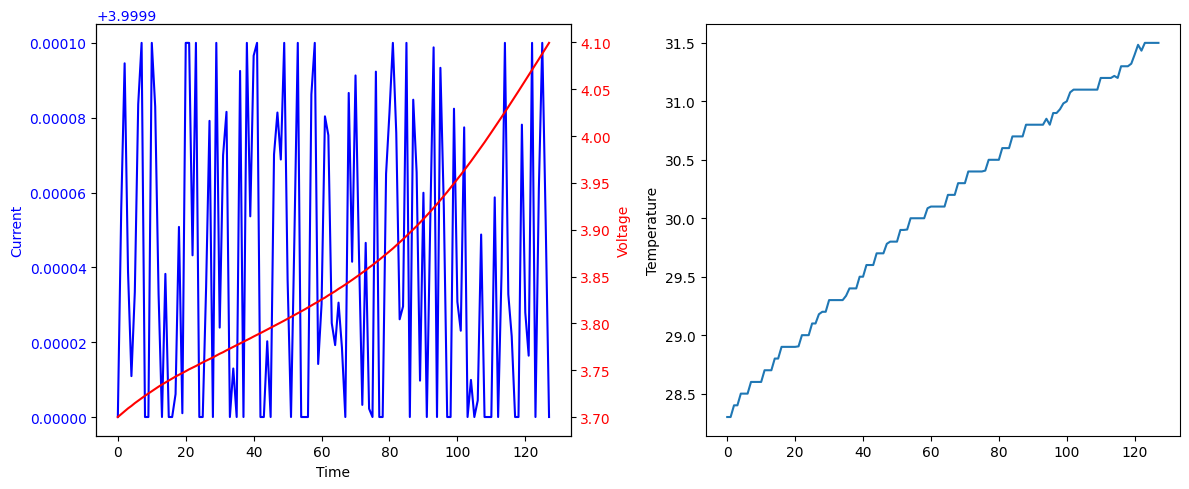

In [5]:
cycle_data = current_battery[0,120]
current = cycle_data["current_A"]
voltage = cycle_data["voltage_V"]
temperature = cycle_data["temperature_C"]

fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot current on the left y-axis
ax[0].plot(current.reshape(-1,1), 'b-', label='Current')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Current', color='b')
ax[0].tick_params(axis='y', labelcolor='b')

# Create a second y-axis for voltage
ax2 = ax[0].twinx()
ax2.plot(voltage.reshape(-1,1), 'r-', label='Voltage')
ax2.set_ylabel('Voltage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[1].plot(temperature.reshape(-1,1), label="Temperature")
ax[1].set_ylabel("Temperature")



fig.tight_layout()  # Adjust layout to fit both labels
plt.show()

In [11]:
abc = torch.randn(1, 3, 100)
weight = torch.tensor([[1,1],[-1,1]], dtype=torch.float32).repeat(6,1,1)
weight


tensor([[[ 1.,  1.],
         [-1.,  1.]],

        [[ 1.,  1.],
         [-1.,  1.]],

        [[ 1.,  1.],
         [-1.,  1.]],

        [[ 1.,  1.],
         [-1.,  1.]],

        [[ 1.,  1.],
         [-1.,  1.]],

        [[ 1.,  1.],
         [-1.,  1.]]])

In [ ]:
# Define weight filters: (out_channels=6, in_channels=3, kernel_size=2)
filter_base = torch.tensor([[1, 1], [-1, 1]], dtype=torch.float32)  # (2, 2)
weight = filter_base.repeat(6, 1, 1)  # (3 * 2, 2)
weight = weight.view(3 * 2, 3, 2)  # Reshape to (6, 3, 2)

RuntimeError: shape '[6, 3, 2]' is invalid for input of size 12